# 빅데이터분석 특강 기말고사 예상문제 

## imports

In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf 
import tensorflow.experimental.numpy as tnp 

In [2]:
tnp.experimental_enable_numpy_behavior()

In [3]:
%load_ext tensorboard

In [4]:
import graphviz
def gv(s): return graphviz.Source('digraph G{ rankdir="LR"'+ s + ';}')

## 1. Fashion_mnist, DNN (30점)

#### `(1)` 
`tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

- 평가지표로 accuracy를 이용할 것 
- epoch은 10으로 설정할 것 
- optimizer는 adam을 이용할 것 

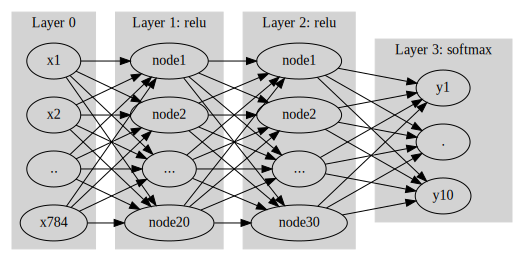

In [5]:
#collapse
gv('''
splines=line
subgraph cluster_1{
    style=filled;
    color=lightgrey;
    "x1"
    "x2"
    ".."
    "x784"
    label = "Layer 0"
}
subgraph cluster_2{
    style=filled;
    color=lightgrey;
    "x1" -> "node1"
    "x2" -> "node1"
    ".." -> "node1"
    "x784" -> "node1"
    
    "x1" -> "node2"
    "x2" -> "node2"
    ".." -> "node2"
    "x784" -> "node2"
    
    "x1" -> "..."
    "x2" -> "..."
    ".." -> "..."
    "x784" -> "..."

    "x1" -> "node20"
    "x2" -> "node20"
    ".." -> "node20"
    "x784" -> "node20"


    label = "Layer 1: relu"
}
subgraph cluster_3{
    style=filled;
    color=lightgrey;
    "node1" -> "node1 "
    "node2" -> "node1 "
    "..." -> "node1 "
    "node20" -> "node1 "
    
    "node1" -> "node2 "
    "node2" -> "node2 "
    "..." -> "node2 "
    "node20" -> "node2 "
    
    "node1" -> "... "
    "node2" -> "... "
    "..." -> "... "
    "node20" -> "... "

    "node1" -> "node30 "
    "node2" -> "node30 "
    "..." -> "node30 "
    "node20" -> "node30 "


    label = "Layer 2: relu"
}
subgraph cluster_4{
    style=filled;
    color=lightgrey;

    "node1 " -> "y10"
    "node2 " -> "y10"
    "... " -> "y10"
    "node30 " -> "y10"
    
    "node1 " -> "y1"
    "node2 " -> "y1"
    "... " -> "y1"
    "node30 " -> "y1"
    
    "node1 " -> "."
    "node2 " -> "."
    "... " -> "."
    "node30 " -> "."
    
    label = "Layer 3: softmax"
}
''')


In [129]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [130]:
X = tf.constant(x_train.reshape(-1,28,28,1),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,28,28,1),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [131]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])
net1.fit(X,y,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 18s 10ms/step - loss: 2.5210 - accuracy: 0.1373
Epoch 2/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.7486 - accuracy: 0.2578
Epoch 3/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5934 - accuracy: 0.3194
Epoch 4/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.5165 - accuracy: 0.3574
Epoch 5/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.3497 - accuracy: 0.4316
Epoch 6/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.3003 - accuracy: 0.4457
Epoch 7/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2845 - accuracy: 0.4462
Epoch 8/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2726 - accuracy: 0.4517
Epoch 9/10
1875/1875 [==============================] - 18s 10ms/step - loss: 1.2789 - accuracy: 0.4510
Epoch 10/10
1875/1875 [==============================] - 18s 9ms

#### `(2)` 
(1)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. 

In [132]:
net1.evaluate(XX,yy)  #평가를 해보자

313/313 [==============================] - 4s 12ms/step - loss: 1.2462 - accuracy: 0.4610


[1.2461601495742798, 0.460999995470047]

#### `(3)` 
train set에서 20%의 자료를 validation 으로 분리하여 50에폭동안 학습하라. 텐서보드를 이용하여 train accuracy와 validation accuracy를 시각화 하고 결과를 해석하라. 오버피팅이라고 볼 수 있는가? 

In [133]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [134]:
cb1 = tf.keras.callbacks.TensorBoard()
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=cb1,verbose=1) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 4.7876 - accuracy: 0.1153 - val_loss: 2.2636 - val_accuracy: 0.1415
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.1072 - accuracy: 0.2081 - val_loss: 2.0320 - val_accuracy: 0.2234
Epoch 3/50
240/240 [==============================] - 3s 12ms/step - loss: 1.9800 - accuracy: 0.2413 - val_loss: 1.9648 - val_accuracy: 0.2407
Epoch 4/50
240/240 [==============================] - 3s 12ms/step - loss: 1.8763 - accuracy: 0.2677 - val_loss: 1.7393 - val_accuracy: 0.3228
Epoch 5/50
240/240 [==============================] - 3s 12ms/step - loss: 1.6501 - accuracy: 0.3335 - val_loss: 1.4906 - val_accuracy: 0.4201
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 1.4070 - accuracy: 0.4271 - val_loss: 1.4017 - val_accuracy: 0.4347
Epoch 7/50
240/240 [==============================] - 3s 12ms/step - loss: 1.3177 - accuracy: 0.4589 - val_loss: 1.2631 - val_accuracy: 0.4858

KeyboardInterrupt: 

In [30]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 381011), started 0:03:42 ago. (Use '!kill 381011' to kill it.)

In [35]:
#!kill 381011

#### `(4)`
(3)에서 적합된 네트워크를 이용하여 test data의 accuracy를 구하라. (2)의 결과와 비교하라. 

In [27]:
net1.evaluate(XX,yy)  #평가를 해보자

313/313 [==============================] - 4s 12ms/step - loss: 0.6981 - accuracy: 0.7451


[0.6980773210525513, 0.7451000213623047]

#### `(5)`
조기종료기능을 이용하여 (3)의 네트워크를 다시 학습하라. 학습결과를 텐서보드를 이용하여 시각화 하라. 
- patience=3 으로 설정할 것

In [ ]:
tf.random.set_seed(1234)
net1 = tf.keras.Sequential()
net1.add(tf.keras.layers.Flatten())
net1.add(tf.keras.layers.Dense(20,activation='relu'))
net1.add(tf.keras.layers.Dense(30,activation='relu'))
net1.add(tf.keras.layers.Dense(10,activation='softmax'))
net1.compile(loss=tf.losses.categorical_crossentropy, optimizer='adam',metrics=['accuracy'])

In [34]:
cb1 = tf.keras.callbacks.TensorBoard()
cb2 = tf.keras.callbacks.EarlyStopping(patience=3)
net1.fit(X,y,epochs=50,batch_size=200,validation_split=0.2,callbacks=[cb1,cb2]) 

Epoch 1/50
240/240 [==============================] - 3s 13ms/step - loss: 5.1090 - accuracy: 0.2137 - val_loss: 2.1368 - val_accuracy: 0.1933
Epoch 2/50
240/240 [==============================] - 3s 12ms/step - loss: 2.0072 - accuracy: 0.2474 - val_loss: 1.8946 - val_accuracy: 0.2803
Epoch 3/50
240/240 [==============================] - 3s 13ms/step - loss: 1.7588 - accuracy: 0.3419 - val_loss: 1.6635 - val_accuracy: 0.3781
Epoch 4/50
240/240 [==============================] - 3s 13ms/step - loss: 1.5388 - accuracy: 0.4027 - val_loss: 1.4518 - val_accuracy: 0.4381
Epoch 5/50
240/240 [==============================] - 3s 13ms/step - loss: 1.3729 - accuracy: 0.4580 - val_loss: 1.3603 - val_accuracy: 0.4713
Epoch 6/50
240/240 [==============================] - 3s 12ms/step - loss: 1.2552 - accuracy: 0.4972 - val_loss: 1.2395 - val_accuracy: 0.5066
Epoch 7/50
240/240 [==============================] - 3s 13ms/step - loss: 1.1851 - accuracy: 0.5275 - val_loss: 1.1838 - val_accuracy: 0.5468

In [90]:
%tensorboard --logdir logs --host 0.0.0.0 

Reusing TensorBoard on port 6006 (pid 381901), started 0:38:25 ago. (Use '!kill 381901' to kill it.)

In [92]:
#!kill 381901

## 2. Fashion_mnist, CNN (30점)

#### `(1)`
`tf.keras.datasets.fashion_mnist.load_data()`을 이용하여 fashion_mnist 자료를 불러온 뒤 아래의 네트워크를 이용하여 적합하라. 

![](https://editor.analyticsvidhya.com/uploads/90650dnn2.jpeg)

- 이때 n1=6, n2=16, n3=120 으로 설정한다, 드랍아웃비율은 20%로 설정한다.
- `net.summary()`를 출력하여 설계결과를 확인하라.

In [71]:
tf.random.set_seed(1234)
net2 = tf.keras.Sequential()
net2.add(tf.keras.layers.Conv2D(6,(2,2),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Conv2D(16,(2,2),activation='relu'))
net2.add(tf.keras.layers.MaxPool2D()) 
net2.add(tf.keras.layers.Flatten())
net2.add(tf.keras.layers.Dense(120,activation='relu'))
net2.add(tf.keras.layers.Dropout(0.2))
net2.add(tf.keras.layers.Dense(10,activation='softmax'))
net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')

In [72]:
c1,m1,c2,m2,flttn,dns1,dropout,dns2 = net2.layers

In [73]:
print(c1(X).shape)
print(m1(c1(X)).shape)
print(c2(m1(c1(X))).shape)
print(m2(c2(m1(c1(X)))).shape)
print(flttn(m2(c2(m1(c1(X))))).shape)
print(dns1(flttn(m2(c2(m1(c1(X)))))).shape)
print(dropout(dns1(flttn(m2(c2(m1(c1(X))))))).shape)
print(dns2(dropout(dns1(flttn(m2(c2(m1(c1(X)))))))).shape)

(60000, 27, 27, 6)
(60000, 13, 13, 6)
(60000, 12, 12, 16)
(60000, 6, 6, 16)
(60000, 576)
(60000, 120)
(60000, 120)
(60000, 10)


In [74]:
net2.fit(X,y,epochs=10,batch_size=200) 

Epoch 1/10
300/300 [==============================] - 2s 5ms/step - loss: 2.2224 - accuracy: 0.6972
Epoch 2/10
300/300 [==============================] - 2s 5ms/step - loss: 0.5656 - accuracy: 0.7963
Epoch 3/10
300/300 [==============================] - 2s 6ms/step - loss: 0.4824 - accuracy: 0.8240
Epoch 4/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4367 - accuracy: 0.8402
Epoch 5/10
300/300 [==============================] - 2s 5ms/step - loss: 0.4040 - accuracy: 0.8491
Epoch 6/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3772 - accuracy: 0.8583
Epoch 7/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3587 - accuracy: 0.8648
Epoch 8/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3401 - accuracy: 0.8711
Epoch 9/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3299 - accuracy: 0.8748
Epoch 10/10
300/300 [==============================] - 2s 5ms/step - loss: 0.3184 - accuracy: 0.8783

In [81]:
net2.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 27, 27, 6)         30        
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 13, 13, 6)        0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 12, 12, 16)        400       
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 16)         0         
 2D)                                                             
                                                                 
 flatten_11 (Flatten)        (None, 576)               0         
                                                                 
 dense_19 (Dense)            (None, 120)             

#### `(2)`
n1=(6,64,128), n2=(16,256)에 대하여 test set의 loss가 최소화되는 조합을 찾아라. 결과를 텐서보드로 시각화하는 코드를 작성하라. 
- epoc은 3회로 한정한다. 
- validation_split은 0.2로 설정한다. 

In [86]:
from tensorboard.plugins.hparams import api as hp

In [89]:
tf.random.set_seed(1234)
!rm -rf logs
for u in [6,64,128]: 
    for d in [16,256]: 
        logdir = 'logs/hpguebin_{}_{}'.format(u,d)
        with tf.summary.create_file_writer(logdir).as_default():
            net2 = tf.keras.Sequential()
            net2.add(tf.keras.layers.Conv2D(u,(2,2),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Conv2D(d,(2,2),activation='relu'))
            net2.add(tf.keras.layers.MaxPool2D()) 
            net2.add(tf.keras.layers.Flatten())
            net2.add(tf.keras.layers.Dense(120,activation='relu'))
            net2.add(tf.keras.layers.Dropout(0.2))
            net2.add(tf.keras.layers.Dense(10,activation='softmax'))
            net2.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
            cb3 = hp.KerasCallback(logdir, {'n1':u, 'n2':d})
            net2.fit(X,y,epochs=3,batch_size=200,validation_split=0.2,callbacks=cb3)
            _rslt=net2.evaluate(XX,yy)
            tf.summary.scalar('n1과 n2 비교(test)', _rslt[0], step=1) 

Epoch 1/3
240/240 [==============================] - 2s 8ms/step - loss: 3.0794 - accuracy: 0.6695 - val_loss: 0.5794 - val_accuracy: 0.7928
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.6153 - accuracy: 0.7808 - val_loss: 0.5013 - val_accuracy: 0.8144
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.4822 - accuracy: 0.8311
Epoch 1/3
240/240 [==============================] - 3s 9ms/step - loss: 1.9566 - accuracy: 0.6817 - val_loss: 0.4423 - val_accuracy: 0.8449
Epoch 2/3
240/240 [==============================] - 2s 8ms/step - loss: 0.5072 - accuracy: 0.8134 - val_loss: 0.3774 - val_accuracy: 0.8670
Epoch 3/3
313/313 [==============================] - 4s 12ms/step - loss: 0.3603 - accuracy: 0.8684
Epoch 1/3
240/240 [==============================] - 3s 12ms/step - loss: 1.2385 - accuracy: 0.7344 - val_loss: 0.4734 - val_accuracy: 0.8284
Epoch 2/3
240/240 [==============================] - 3s 12ms/step - loss: 0.4562 - accuracy: 0

In [93]:
%tensorboard --logdir logs --host 0.0.0.0

## 3. CIFAR10 (30점)

`tf.keras.datasets.cifar10.load_data()`을 이용하여 CIFAR10을 불러온 뒤 적당한 네트워크를 사용하여 적합하라. 

- 결과를 텐서보드로 시각화할 필요는 없다. 
- 자유롭게 모형을 설계하여 적합하라. 
- test set의 accuracy가 70%이상인 경우만 정답으로 인정한다. 

In [106]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

In [110]:
X = tf.constant(x_train.reshape(-1,32,32,3),dtype=tf.float64)
y = tf.keras.utils.to_categorical(y_train)
XX = tf.constant(x_test.reshape(-1,32,32,3),dtype=tf.float64)
yy = tf.keras.utils.to_categorical(y_test)

In [111]:
print(X.shape)
print(y.shape)
print(XX.shape)
print(yy.shape)

(50000, 32, 32, 3)
(50000, 10)
(10000, 32, 32, 3)
(10000, 10)


In [124]:
tf.random.set_seed(1234)
net3 = tf.keras.Sequential()
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.Conv2D(500,(2,2),activation='relu'))
net3.add(tf.keras.layers.MaxPool2D()) 
net3.add(tf.keras.layers.Flatten())
net3.add(tf.keras.layers.Dense(128,activation='relu'))
net3.add(tf.keras.layers.Dense(10,activation='softmax'))
net3.compile(optimizer='adam', loss=tf.losses.categorical_crossentropy,metrics='accuracy')
net3.fit(X,y,epochs=10,batch_size=200)

Epoch 1/10
250/250 [==============================] - 35s 137ms/step - loss: 3.1167 - accuracy: 0.3704
Epoch 2/10
250/250 [==============================] - 34s 137ms/step - loss: 1.2320 - accuracy: 0.5657
Epoch 3/10
250/250 [==============================] - 34s 137ms/step - loss: 0.9789 - accuracy: 0.6604
Epoch 4/10
250/250 [==============================] - 34s 137ms/step - loss: 0.8302 - accuracy: 0.7110
Epoch 5/10
250/250 [==============================] - 34s 137ms/step - loss: 0.7202 - accuracy: 0.7527
Epoch 6/10
250/250 [==============================] - 34s 137ms/step - loss: 0.6253 - accuracy: 0.7857
Epoch 7/10
250/250 [==============================] - 34s 137ms/step - loss: 0.5361 - accuracy: 0.8148
Epoch 8/10
250/250 [==============================] - 34s 137ms/step - loss: 0.4463 - accuracy: 0.8444
Epoch 9/10
250/250 [==============================] - 34s 137ms/step - loss: 0.3753 - accuracy: 0.8687
Epoch 10/10
250/250 [==============================] - 34s 137ms/step - l

In [125]:
net3.evaluate(XX,yy)

313/313 [==============================] - 5s 16ms/step - loss: 1.0667 - accuracy: 0.7164


[1.06668221950531, 0.7164000272750854]

## 4. 다음을 읽고 물음에 답하라. (10점)

#### (1)
(1,128,128,3)의 shape을 가진 텐서가 `tf.keras.layers.Conv2D(5,(2,2))`으로 만들어진 커널을 통과할시 나오는 shape은?

A : (1,127,127,5)

#### (2)
(1,24,24,16)의 shape을 가진 텐서가 `tf.keras.layers.Flatten()`을 통과할때 나오는 텐서의 shape은? 

In [121]:
24*24*16

9216

A : (1,9216)

#### (3)
관측치의 수가 10인 자료에서 batch_size=3으로 설정하면 한 에폭당 몇번의 이터레이션이 수행되는가?

A : 3

#### (4)
적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. (2,2) 크기의 커널을 가진 Conv2D layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다)

A : 4

#### (5)
적당한 선형변환을 적용하여 (28,28)의 크기를 가진 흑백이미지를 (27,27)의 크기를 가지는 흑백이미지로 바꾸려 한다. Dense layer를 이용한다면 몇개의 가중치가 필요한가? (바이어스는 무시한다)

A : 1